In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Dataset 2


## Etapa 1

Começou-se por carregar os dados e metadados. De seguida analisaram-se as suas dimensões (20531 genes para 517 amostras de 515 
pacientes, onde dois apresentam duas amostras), e identificaram-se os tipos de atributos em cada um e fez-se um pequena analise estatística para uma melhor perceção inicial dos datasets.

Nos dados de expressão genética verificou-se a existência de 2 valores nulos na primeira coluna (_HUGO Symbol- Human Genome Organization_ )seguindo-se a sua remoção, passando para uma dimensão de 20529 genes. Relativamente aos metadados, removeu-se uma coluna por redundância e selecionaram-se as colunas mais relevantes para utilizar na análise, segundo o valor dado às mesmas no artigo e evitando colunas com um elevado número de valores nulos (NA), destas os valores em falta foram substituídos pela média ou moda dos atributos. Foram selecionados _Diagnosis Age (float), Fraction Genome Altered (float), Sex (object), Patient's Vital Status (object)_ e _American Joint Committee on Cancer Tumor Stage Code (object)_ com estágios T1 a T4, onde T1 é uma lesão confinada ao órgão de origem e T4 uma lesão massiva ou que invade diretamente outro órgão ou víscera, nervos, artérias ou osso. Também se selecionou _Patient Smoking History Category (float)_ , com valores de 1 a 5, cujo o primeiro, por exemplo, corresponde a uma pessoa que na altura da entrevista não fumava e fumou menos de 100 cigarros na sua vida, e o por fim o atributo _Prior Cancer Diagnosis Occurence_ que descrever o histórico clínico do paciente. Estas variáveis foram melhor exploradas, com diferentes representações gráficas.


### Dados RNAseq

In [2]:
# Carregar o dataset, colocou-se o Entrez_Gene_Id como coluna índice
data_luad = pd.read_csv("data_RNA_Seq_v2_expression_median.txt",sep="\t",index_col=1)

In [3]:
# Verificar a dimensão do dataset
data_luad.shape

(20531, 518)

In [4]:
# Verificar o tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data_luad.dtypes)

Tipos de atributos (dados):
Hugo_Symbol         object
TCGA-05-4244-01    float64
TCGA-05-4249-01    float64
TCGA-05-4250-01    float64
TCGA-05-4382-01    float64
                    ...   
TCGA-NJ-A55O-01    float64
TCGA-NJ-A55R-01    float64
TCGA-NJ-A7XG-01    float64
TCGA-O1-A52J-01    float64
TCGA-S2-AA1A-01    float64
Length: 518, dtype: object


In [5]:
#retornar por padrão as primeiras 5 linhas do dataset
data_luad.head()

,Hugo_Symbol,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100130426,LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
100133144,UBE2Q2P3,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,13.5406,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
100134869,UBE2Q2P3,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,16.0273,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
10357,LOC149767,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1809,57.0596,108.4155,...,163.5739,130.7486,101.7403,82.4231,100.4196,100.1867,74.7210,85.3715,61.1388,76.9265
10431,TIMM23,848.9397,924.0158,1140.6781,807.1729,562.0037,1342.6174,1148.3315,955.9141,844.5792,...,919.1686,403.4911,918.9533,995.6058,536.7602,873.9790,766.7448,677.7333,1137.3206,565.4335


In [6]:
#Selecionar a coluna HUGO_Symbol (coluna 0) (Human Genome Organization) e quantificar valores nulos
data_luad.iloc[:,0].isnull().sum() # HUGO - valores nulos

2

In [7]:
#Tratamento de valores nulos

#remover linhas com Hugo Symbol como NaN (not a number)
data_hugo_luad = data_luad[data_luad.notna()['Hugo_Symbol']] 
#definir o Hugo_symbol como id do gene, sendo removida a coluna anterior (Entrez_Gene_Id), visto que era informação repetida
data_hugo_luad = data_hugo_luad.set_index("Hugo_Symbol", drop=True)

In [8]:
#verificar a dimensão do dataset sem valores nulos
data_hugo_luad.shape  # 20529 genes e 517 amostras (cada coluna é uma amostra)
                      # a coluna index é contabilizada

(20529, 517)

In [9]:
#retornar por padrão as primeiras 5 linhas do dataset sem valores nulos e com Hugo_symbol como chave
data_hugo_luad.head()

,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,TCGA-05-4397-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
UBE2Q2P3,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,13.5406,9.4467,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
UBE2Q2P3,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,16.0273,10.4318,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
LOC149767,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1809,57.0596,108.4155,84.2496,...,163.5739,130.7486,101.7403,82.4231,100.4196,100.1867,74.7210,85.3715,61.1388,76.9265
TIMM23,848.9397,924.0158,1140.6781,807.1729,562.0037,1342.6174,1148.3315,955.9141,844.5792,1397.9017,...,919.1686,403.4911,918.9533,995.6058,536.7602,873.9790,766.7448,677.7333,1137.3206,565.4335


In [11]:
# Transposta para colocar 1 gene em cada coluna
# Describe - análise estatística
    # Contagem (count): Número de observações não nulas.
    # Média (mean): Média aritmética dos valores.
    # Desvio padrão (std): Medida de dispersão dos valores em relação à média.
    # Valor mínimo (min): Menor valor na coluna.
    # Quartil inferior (25%): Valor abaixo do qual 25% dos dados se encontram.
    # Mediana (50%): Valor abaixo do qual 50% dos dados se encontram (também conhecido como segundo quartil).
    # Quartil superior (75%): Valor abaixo do qual 75% dos dados se encontram.
    # Valor máximo (max): Maior valor na coluna.
data_transposta = data_hugo_luad.transpose()
data_transposta.describe()

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.019793,12.563599,13.772414,109.191745,921.412556,0.000518,200.965270,0.456712,0.144994,0.0,...,48.018296,383.145637,1082.626088,61.012445,849.987180,4049.562512,1080.205735,710.462033,127.999331,0.176634
std,0.110964,10.824164,11.507095,54.083375,362.542965,0.011769,156.827547,0.605640,1.625181,0.0,...,21.424549,169.977557,339.329517,74.516301,259.159593,1869.604727,440.005370,319.317913,251.016470,0.896453
min,0.000000,0.000000,0.000000,36.357000,270.115400,0.000000,11.022000,0.000000,0.000000,0.0,...,8.879000,34.099400,311.314600,0.000000,264.413200,446.043200,183.841200,219.603600,0.685400,0.000000
25%,0.000000,5.357900,5.888000,78.785300,671.334600,0.000000,89.459200,0.000000,0.000000,0.0,...,34.482800,276.152700,851.610700,5.879200,675.758400,2650.125500,776.395500,548.513500,10.759700,0.000000
50%,0.000000,10.456700,11.282000,97.173100,848.939700,0.000000,160.488400,0.305600,0.000000,0.0,...,44.308600,346.751700,1040.429600,37.424400,815.834800,3811.870500,1033.582100,663.253200,25.665900,0.000000
75%,0.000000,16.079700,17.981600,122.073800,1072.048400,0.000000,269.594000,0.746300,0.000000,0.0,...,58.514100,463.612700,1257.618600,86.475300,978.162000,5176.296700,1339.449500,807.746300,128.659200,0.000000
max,1.328100,84.739200,107.370500,677.255900,2678.614800,0.267600,1477.014100,5.281000,33.737500,0.0,...,217.434200,1749.691600,3016.414100,472.129300,2453.159500,15291.709300,2811.271300,4961.792200,2692.689000,13.407300


### Metadados

In [12]:
# Carregar metadados
# Selecionou-se a coluna Sample ID como índice porque é a coluna que ambos os datasets têm em comum
meta_luad = pd.read_csv("luad_tcga_clinical_data.tsv",sep="\t",header=0,index_col=2)

#Eliminar coluna Study ID por identificar o estudo, que é igual em todas as amostras, sendo por isso irrelevante
del meta_luad["Study ID"]

In [13]:
#verificar a dimensão dos metadados
meta_luad.shape  ## 517 amostras x 106 variaveis

(517, 106)

In [14]:
#verificaram-se que havia 515 id paciente únicos, ou seja, há 2 pacientes que têm 2 amostras
len(meta_luad["Patient ID"].unique())

515

In [15]:
# verificar o tipo de atributos nos metadados
print("Tipos de atributos (metadados):")
print(meta_luad.dtypes)

Tipos de atributos (metadados):
Patient ID                                                                          object
Diagnosis Age                                                                      float64
Neoplasm Disease Stage American Joint Committee on Cancer Code                     float64
Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage    float64
American Joint Committee on Cancer Metastasis Stage Code                            object
                                                                                    ...   
Primary Therapy Outcome Success Type                                                object
Tumor Site                                                                          object
Person Neoplasm Status                                                              object
Vial number                                                                         object
Patient's Vital Status                                    

In [16]:
#retornar por padrão as primeiras 5 linhas dos metadados
meta_luad.head()

,Patient ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Lymph Node Stage Code,American Joint Committee on Cancer Lymph Node Stage Code.1,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,...,Adjuvant Postoperative Targeted Therapy Administered Indicator,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,TCGA-05-4244,70.0,NaN,NaN,M1,NaN,NaN,N2,Stage IV,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4249-01,TCGA-05-4249,67.0,NaN,NaN,M0,NaN,NaN,N0,Stage IB,6th,...,NaN,NaN,NaN,5,3.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4250-01,TCGA-05-4250,79.0,NaN,NaN,M0,NaN,NaN,N1,Stage IIIA,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,NaN,A,Dead
TCGA-05-4382-01,TCGA-05-4382,68.0,NaN,NaN,M0,NaN,NaN,N0,Stage IB,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4384-01,TCGA-05-4384,66.0,NaN,NaN,M0,NaN,NaN,N2,Stage IIIA,6th,...,NaN,NaN,NaN,5,3.0,NaN,Lung,NaN,A,Alive


In [17]:
# Análise estatística dos metadados
meta_luad.describe(include = "all")

,Patient ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Lymph Node Stage Code,American Joint Committee on Cancer Lymph Node Stage Code.1,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,...,Adjuvant Postoperative Targeted Therapy Administered Indicator,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
count,517,498.000000,0.0,0.0,513,0.0,0.0,516,509,494,...,154,0.0,0.0,517,503.000000,149,517,419,515,517
unique,515,NaN,NaN,NaN,5,NaN,NaN,5,9,5,...,2,NaN,NaN,33,NaN,4,1,2,2,2
top,TCGA-50-5946,NaN,NaN,NaN,M0,NaN,NaN,N0,Stage IB,7th,...,NO,NaN,NaN,55,NaN,Complete Remission/Response,Lung,TUMOR FREE,A,Alive
freq,2,NaN,NaN,NaN,347,NaN,NaN,333,140,268,...,117,NaN,NaN,91,NaN,128,517,308,512,330
mean,NaN,65.373494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.813121,NaN,NaN,NaN,NaN,NaN
std,NaN,9.921273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.084510,NaN,NaN,NaN,NaN,NaN
min,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,72.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


In [18]:
# Verificar se os valores ordenados dos linhas de meta_luad são iguais aos valores ordenados das colunas de data_hugo_luad
(meta_luad.index.sort_values() == data_hugo_luad.columns.sort_values()).sum()# as duas tabelas são relacionadas pelo Sample ID

517

#### Seleção dos meta-dados mais relevantes

In [19]:
# Selecionaram-se os meta-dados:
# Age diagnosis, Sex, Patient's Vital Status, American Joint Committee on Cancer Tumor Stage Code, Fraction Genome Altered,Patient Smoking History Category

new_meta = meta_luad[['Diagnosis Age','Fraction Genome Altered','Sex',"Patient's Vital Status",'American Joint Committee on Cancer Tumor Stage Code','Patient Smoking History Category','Prior Cancer Diagnosis Occurence']]
print(new_meta.head) 

<bound method NDFrame.head of                  Diagnosis Age  Fraction Genome Altered     Sex  \
Sample ID                                                         
TCGA-05-4244-01           70.0                   0.4565    MALE   
TCGA-05-4249-01           67.0                   0.2221    Male   
TCGA-05-4250-01           79.0                   0.2362  Female   
TCGA-05-4382-01           68.0                   0.0854    Male   
TCGA-05-4384-01           66.0                   0.0661    Male   
...                        ...                      ...     ...   
TCGA-NJ-A55O-01           56.0                   0.0194  Female   
TCGA-NJ-A55R-01           67.0                   0.0760    Male   
TCGA-NJ-A7XG-01           49.0                   0.4205    Male   
TCGA-O1-A52J-01           74.0                   0.5443  Female   
TCGA-S2-AA1A-01           68.0                   0.0598  Female   

                Patient's Vital Status  \
Sample ID                                
TCGA-05-4244-0

**Comentário**

No geral a seleção dos meta-dados baseou-se na relevância dada pelo artigo a cada parâmetro, evitando colunas com um elevado número de valores nulos (NA).

Tratamento dos valores nulos nos atributos numéricos, substituindo pela média

In [20]:
# Diagnosis Age
new_meta['Diagnosis Age'].fillna(new_meta['Diagnosis Age'].mean(),inplace=True)
print(new_meta['Diagnosis Age'].isnull().sum())

print(new_meta['Sex'].isnull().sum())

print(new_meta["Prior Cancer Diagnosis Occurence"].isnull().sum())

# Fraction Genome Altered
new_meta['Fraction Genome Altered'].fillna(new_meta['Fraction Genome Altered'].mean(),inplace=True)
print(new_meta['Fraction Genome Altered'].isnull().sum())

print(new_meta['American Joint Committee on Cancer Tumor Stage Code'].isnull().sum())

print(new_meta["Patient's Vital Status"].isnull().sum())



0
0
0
0
0
0


C:\Users\pipap\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
new_meta['Patient Smoking History Category'].fillna(new_meta['Patient Smoking History Category'].mode()[0], inplace=True)
print(new_meta['Patient Smoking History Category'].isnull().sum())



0


In [22]:
# Analisar os novos metadados
new_meta.describe(include = "all")

,Diagnosis Age,Fraction Genome Altered,Sex,Patient's Vital Status,American Joint Committee on Cancer Tumor Stage Code,Patient Smoking History Category,Prior Cancer Diagnosis Occurence
count,517.000000,517.000000,517,517,517,517.000000,517
unique,NaN,NaN,3,2,9,NaN,4
top,NaN,NaN,Female,Alive,T2,NaN,No
freq,NaN,NaN,277,330,169,NaN,426
mean,65.373494,0.264993,NaN,NaN,NaN,2.845261,NaN
std,9.736900,0.189946,NaN,NaN,NaN,1.086939,NaN
min,38.000000,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,59.000000,0.104600,NaN,NaN,NaN,2.000000,NaN
50%,66.000000,0.237000,NaN,NaN,NaN,3.000000,NaN
75%,72.000000,0.399200,NaN,NaN,NaN,4.000000,NaN


#### Gráficos exploratórios

Text(0.5, 1.0, 'Percentagem sobre o estado dos pacientes')

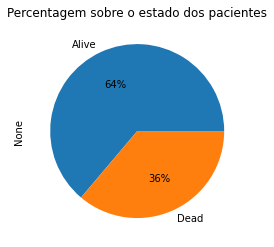

In [23]:
new_meta.groupby("Patient's Vital Status").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem sobre o estado dos pacientes')

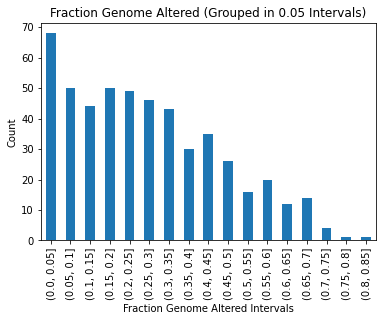

In [24]:
# Criar bins de 0.05
bins = np.arange(0, new_meta['Fraction Genome Altered'].max() + 0.05, 0.05)

# Agrupar os dados em bins e contar o tamanho de cada grupo
fga_groups = pd.cut(new_meta['Fraction Genome Altered'], bins=bins)
grouped_data = new_meta.groupby(fga_groups).size()

# Criar o gráfico de barras
grouped_data.plot.bar()
plt.title('Fraction Genome Altered (Grouped in 0.05 Intervals)')
plt.xlabel('Fraction Genome Altered Intervals')
plt.ylabel('Count')
plt.show()

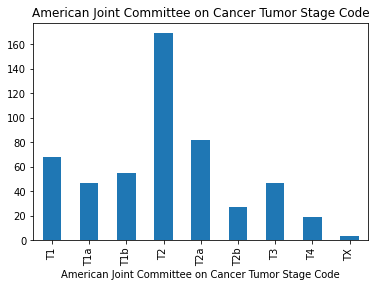

In [25]:
#new_meta.groupby('American Joint Committee on Cancer Tumor Stage Code').size().plot.pie(autopct='%.0f%%')
#plt.title('American Joint Committee on Cancer Tumor Stage Code')
new_meta.groupby('American Joint Committee on Cancer Tumor Stage Code').size().plot.bar()
plt.title('American Joint Committee on Cancer Tumor Stage Code')
plt.show()

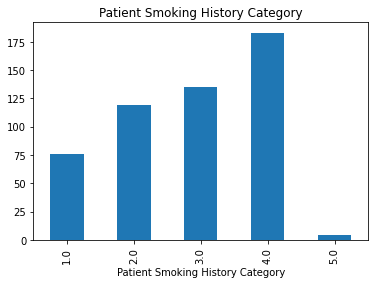

In [26]:
new_meta.groupby('Patient Smoking History Category').size().plot.bar()
plt.title('Patient Smoking History Category')
plt.show()

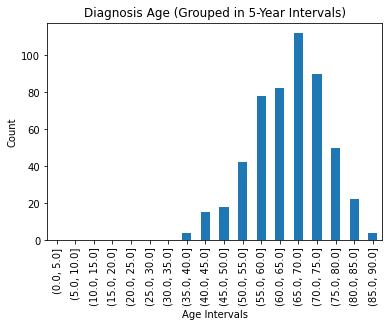

In [27]:
# Criar bins de 5 em 5 anos
bins = np.arange(0, new_meta['Diagnosis Age'].max() + 5, 5)

# Agrupar as idades nos bins e contar o tamanho de cada grupo
age_groups = pd.cut(new_meta['Diagnosis Age'], bins=bins)
grouped_data = new_meta.groupby(age_groups).size()

# Criar o gráfico de barras
grouped_data.plot.bar()
plt.title('Diagnosis Age (Grouped in 5-Year Intervals)')
plt.xlabel('Age Intervals')
plt.ylabel('Count')
plt.show()
# Histograma das idades
#new_meta['Diagnosis Age'].hist()
#plt.xlabel('Idade')
#plt.ylabel('Quantidade')
#plt.title('Distribuição das idades presentes no estudo')
#plt.show()

In [28]:
# substituir um dado para ficar em concordância com os restantes sex
new_meta['Sex']=new_meta['Sex'].replace(['MALE'],'Male')

<ipython-input-28-4497ba082875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_meta['Sex']=new_meta['Sex'].replace(['MALE'],'Male')


Text(0.5, 1.0, 'Percentagem dos géneros')

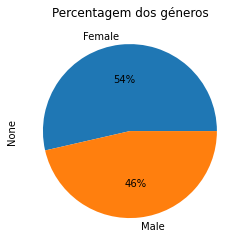

In [29]:
# Percentagens de homens e mulheres presentes no estudo
new_meta.groupby("Sex").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem dos géneros')


Text(0.5, 1.0, 'Percentagem da ocorrência prévia de cancro')

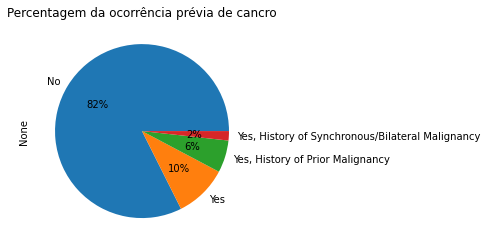

In [30]:
new_meta.groupby("Prior Cancer Diagnosis Occurence").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem da ocorrência prévia de cancro')

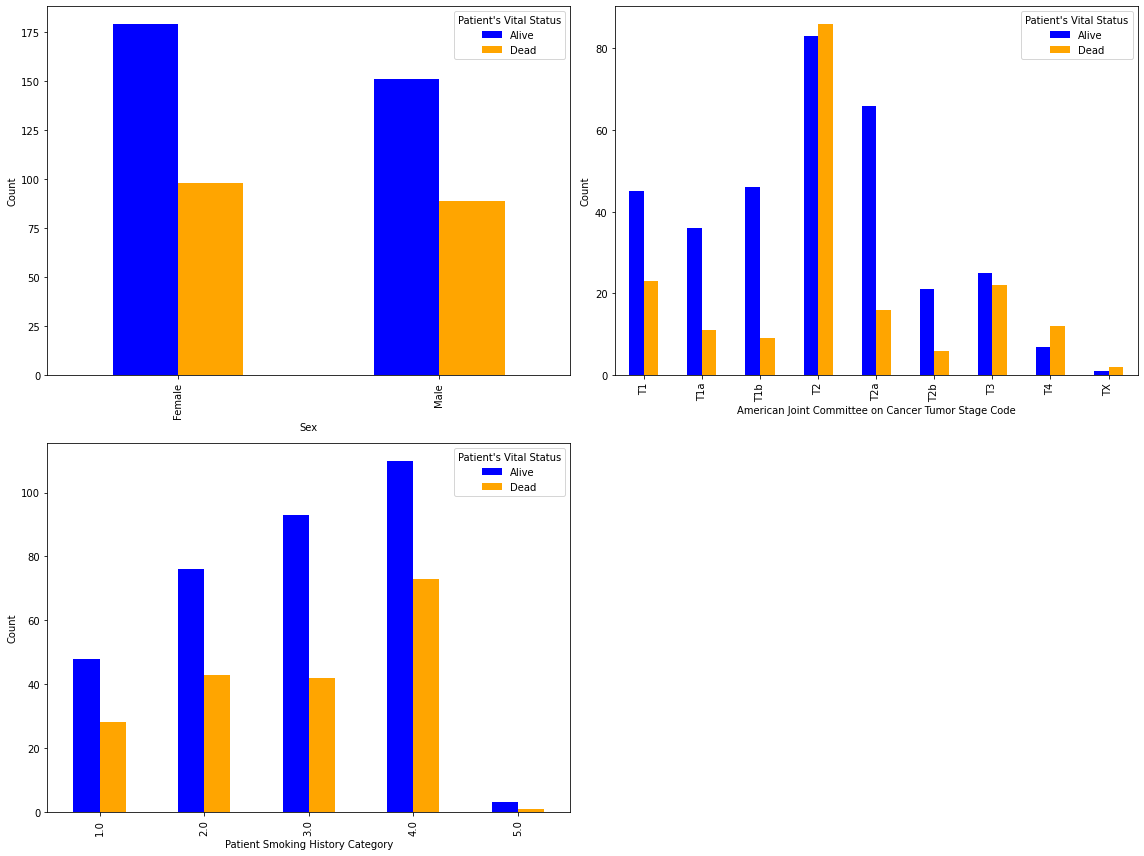

In [31]:
def plot_correlation(cat_1, cat_2):
    plt.figure(figsize=(16, 12)) # tamanho do grafico
    #categorical_columns = ['Sex', 'American Joint Committee on Cancer Tumor Stage Code', 'Patient Smoking History Category']
    colors = ['blue', 'orange', 'red', 'purple','green', 'yellow', 'pink', 'black', 'brown']
    for i, column in enumerate(cat_1, 1):
        plt.subplot(2, 2, i)
        crosstab_data = pd.crosstab(index=new_meta[column], columns=new_meta[cat_2])
        crosstab_data.plot(kind="bar", stacked=False, color=colors, ax=plt.gca())
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
plot_correlation(['Sex', 'American Joint Committee on Cancer Tumor Stage Code', 'Patient Smoking History Category'], "Patient's Vital Status")


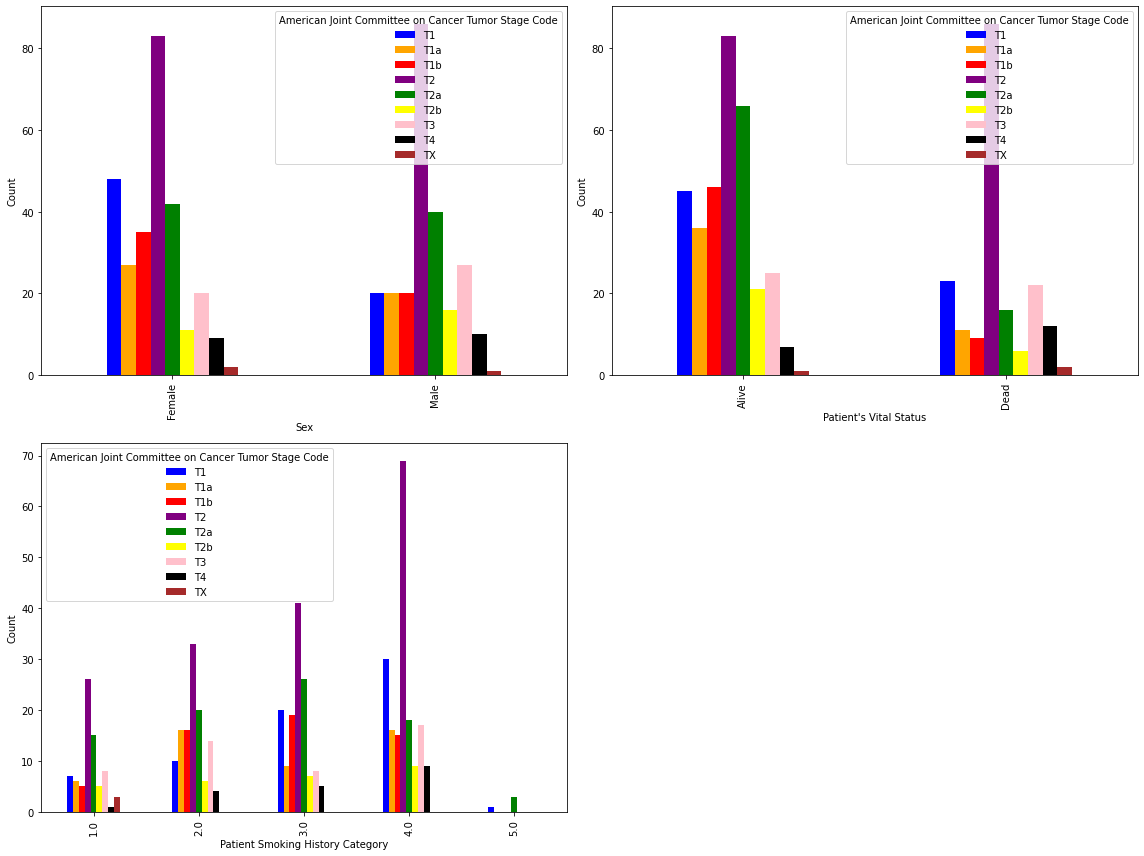

In [32]:
plot_correlation(['Sex', "Patient's Vital Status", 'Patient Smoking History Category'], 'American Joint Committee on Cancer Tumor Stage Code')

<ipython-input-33-e604ca2836f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_meta["Patient's Vital Status"] = new_meta["Patient's Vital Status"].astype('category').cat.codes
<ipython-input-33-e604ca2836f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_meta['Diagnosis Age Group'] = pd.cut(new_meta['Diagnosis Age'], bins=range(0, 100, 5), include_lowest=True, right=False)


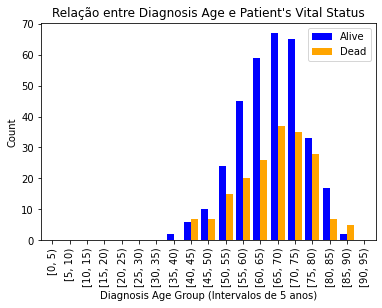

In [33]:
#Conversão dos dados categoricos em numericos para o grafico ?
new_meta["Patient's Vital Status"] = new_meta["Patient's Vital Status"].astype('category').cat.codes

# Intervalos de 5 anos para a 'Diagnosis Age'
new_meta['Diagnosis Age Group'] = pd.cut(new_meta['Diagnosis Age'], bins=range(0, 100, 5), include_lowest=True, right=False)

# Agrupar dados e contar ocorrência de cada combinação
grouped_data = new_meta.groupby(['Diagnosis Age Group', "Patient's Vital Status"]).size().unstack()

# Plot
grouped_data.plot(kind='bar', color=['blue', 'orange'], width=0.8)

# Título e identificacao dos eixos
plt.title('Relação entre Diagnosis Age e Patient\'s Vital Status')
plt.xlabel('Diagnosis Age Group (Intervalos de 5 anos)')
plt.ylabel('Count')

# Legenda
plt.legend(["Alive", "Dead"], loc="upper right")

plt.show()

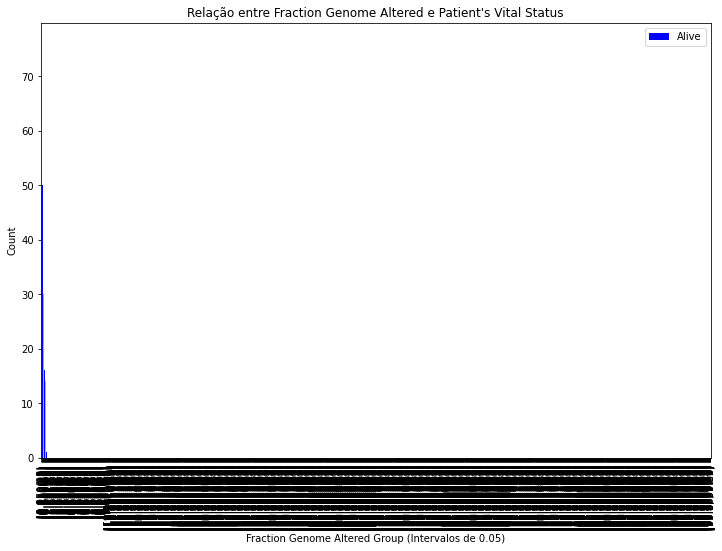

In [34]:

#new_meta["Patient's Vital Status"] = new_meta["Patient's Vital Status"].astype('category').cat.codes

# Intervalos de 0.05 para a 'Fraction Genome Altered'
# arange permitE passos decimais
bins = np.arange(0, 100, 0.05)

# Agrupar em bins e contar o tamanho de cada grupo
fga_groups = pd.cut(new_meta['Fraction Genome Altered'], bins=bins, include_lowest=True, right=False)
grouped_data = new_meta.groupby(fga_groups).size()

# Tamanho da figura
plt.figure(figsize=(12, 8))

# Plot
grouped_data.plot(kind='bar', color=['blue', 'orange'], width=0.8)

# Título e identificacao dos eixos
plt.title('Relação entre Fraction Genome Altered e Patient\'s Vital Status')
plt.xlabel('Fraction Genome Altered Group (Intervalos de 0.05)')
plt.ylabel('Count')

# Legenda
plt.legend(["Alive", "Dead"], loc="upper right")

plt.show()

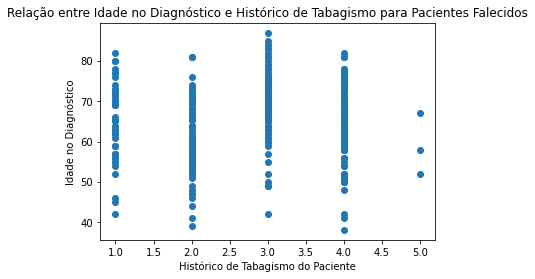

In [35]:
from matplotlib import pyplot

# Filtrar os pacientes que faleceram
deceased_patients = new_meta[new_meta["Patient's Vital Status"] == 0]

# Extrair dados relevantes
OS = deceased_patients['Diagnosis Age'].values
TD = deceased_patients['Patient Smoking History Category'].values

# Plot
pyplot.scatter(TD, OS)
pyplot.xlabel('Histórico de Tabagismo do Paciente')
pyplot.ylabel('Idade no Diagnóstico')
pyplot.title('Relação entre Idade no Diagnóstico e Histórico de Tabagismo para Pacientes Falecidos')

# Ajustar a escala dos eixos
#pyplot.xlim(min(TD), max(TD))  # Define os limites do eixo x com base nos dados
#pyplot.ylim(min(OS), max(OS))  # Define os limites do eixo y com base nos dados

pyplot.show()

## Etapa 2
### Técnicas de redução de dimensionalidade

Para filtrar os seus dados (ao nível dos genes), poderá usar, tal como visto nas aulas, duas estratégias: por variabilidade (e.g. VarianceThreshold) removendo genes que variam pouco – neste caso não depende de nenhuma variável de metadados; por testes 
estatísticos univariados, que selecionam os genes que variam mais entre grupos criados pelos valores de uma variável de metadados (e.g. SelectPercentile ou SelectKBest, com método f-classif, neste caso usando t-test ou ANOVA, dependendo do número de classes da variável de metadados).

#### Variabilidade
Este método foi selecionado pois se adequa a dados com baixa variância e não depende de nenhuma variável dos meta-dados.

In [36]:
# Colocar o dataset como apenas a matriz dos valores
data = data_transposta.values
print(data.shape)

(517, 20529)


In [37]:
print('Dados de expressão genética:')
# calcular a variância para gene
variances = data.var(axis = 0)
print('Número de genes:', variances.shape)

# média
medvar = variances.mean() 
print('Média da Variância:', medvar)

Dados de expressão genética:
Número de genes: (20529,)
Média da Variância: 14004342.851514589


In [38]:
# desvio padrão
std = data.std()
medstd = std.mean()
print('Desvio Padrão:', medstd)

Desvio Padrão: 5100.288514458408


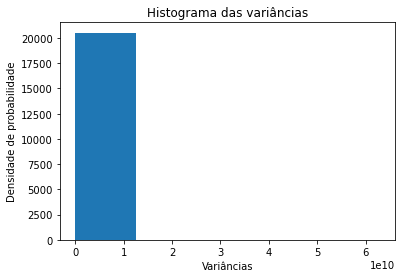

In [39]:
plt.hist(variances, bins = 5)
plt.xlabel('Variâncias')
plt.ylabel('Densidade de probabilidade')
plt.title('Histograma das variâncias')
plt.show()

O único pico à esquerda, indica uma distribuição assimétrica positiva. Isto significa que a maior parte dos genes tem pouca variação, ou seja, tem características semelhantes.

Dúvida...

#### Filtração dos dados

In [40]:
from sklearn.feature_selection import VarianceThreshold

In [41]:
sel = VarianceThreshold(threshold=medvar*3) #por variabilidade, removendo os genes de pouca variância
input_filt = sel.fit_transform(data) 
print(input_filt.shape)

(517, 306)


Como previsto pela distribuição assimétrica, o filtro removeu grande parte dos genes, passando de 20529 para 306 genes. Os 306 genes são os que apresentam maior variância, portanto a sua compreensão trará mais vantagens para a análise.

In [42]:
print('Dados mais relevantes de expressão genética:')
# variância, o input neste caso consiste nos dados filtrados
variances = input_filt.var(axis = 0)
print('Número de genes:', variances.shape)

medvar = variances.mean()
print('Média da Variância:', medvar)

# desvio padrão, o input neste caso consiste nos dados filtrados
std_new = input_filt.std()
print('Desvio Padrão:',std_new)

Dados mais relevantes de expressão genética:
Número de genes: (306,)
Média da Variância: 889978068.7234744
Desvio Padrão: 36245.131712638205


Como se pode verificar, a variancia aumentou significativamente, provando-se a eficácia do filtro. O valor mais elevado de variância permite chegar a conclusões mais interessantes a nível de investigação.

## Análise Multivariada não supervisionada

### PCA - Principal Component Analysis

In [43]:
from sklearn import preprocessing

In [44]:
# Fazer standardização dos dados
# Este método (PCA) é sensível à escala dos dados, sendo necessário normalizá-los.
# Assim, pretende-se que estes tenham média zero e desvio padrão igual a 1.
input_sc = preprocessing.scale(input_filt)
print("Media: ", input_sc.mean())
print("Desvio padrao: ", input_sc.std())

Media:  6.557391146823342e-18
Desvio padrao:  0.9999999999999999


Verificou-se, assim uma média e um desvio padrão próximos do pretendido.

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=20)
X_r = pca.fit(input_sc).transform(input_sc)
print('Variância explicada: %s'% str(pca.explained_variance_ratio_))
#retorna um array da variância explicada por cada componente principal
#cada elem do array representa a proporção da variância do conjunto de dados que é atribuída a um componente principal específico.

pca.explained_variance_ratio_.sum()

Variância explicada: [0.15100994 0.06476635 0.05952286 0.03647153 0.03366649 0.02777834
 0.0231497  0.02157771 0.02001419 0.01934107 0.0146376  0.01373559
 0.0117068  0.01144074 0.01053757 0.00990868 0.00971833 0.00961106
 0.0093456  0.00913811]


0.5670782710366491

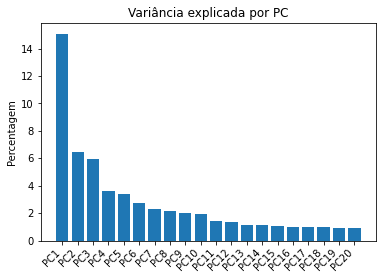

In [47]:
#representação gráfica da variância explicada por PCA
n = 20

plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)],rotation=45, ha='right')
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

explicação:

->

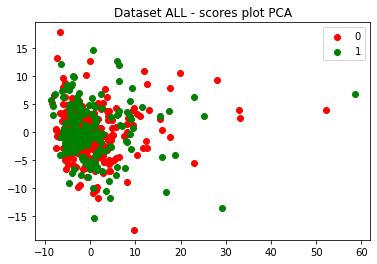

In [53]:
#PCA- scatter relativo ao Estado de Vitalidade do paciente

#output_status = new_meta.iloc[:,3]
output_status = new_meta["Patient's Vital Status"]

plt.figure()
for c, name in zip("rgb", [0, 1]):
    plt.scatter(X_r[output_status == name, 0], X_r[output_status == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()


# Mudar 0-> alive; 1-> Dead


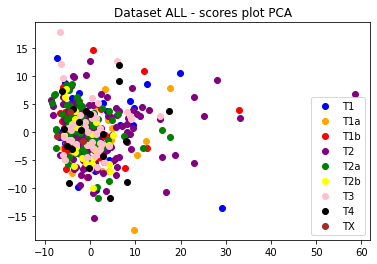

In [54]:
#PCA- scatter relativo ao 



#new_meta = meta_luad[['Diagnosis Age','Fraction Genome Altered','Sex',"Patient's Vital Status",
#                     'American Joint Committee on Cancer Tumor Stage Code',
#                    'Patient Smoking History Category','Prior Cancer Diagnosis Occurence']]

output_stage = new_meta["American Joint Committee on Cancer Tumor Stage Code"]
cores=('blue', 'orange', 'red', 'purple','green', 'yellow', 'pink', 'black', 'brown')
labels=('T1','T1a','T1b','T2','T2a','T2b','T3','T4','TX')
plt.figure()
for c, name in zip(cores,labels):
    plt.scatter(X_r[output_stage == name, 0], X_r[output_stage == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()


In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

KeyError: '1'

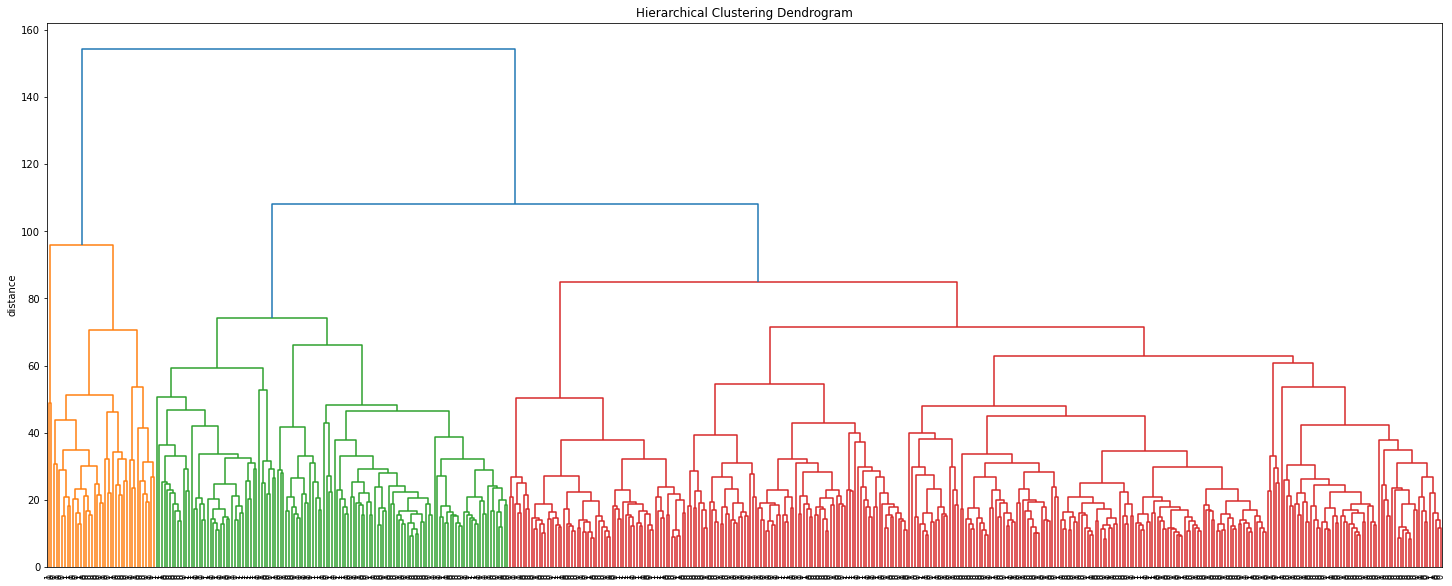

In [56]:
# Dendograma relacionado com o Status
Z = linkage(input_sc, method='ward', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(output_status),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {1: 'g', 0: 'r'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

## Etapa 3

Comparar e analisar o comportamento dos modelos: Random Forest, K Neighbours, SVMs Linear Kernel e Logistic Regression.
    O modelo Random Forest elabora árvores de decisão aleatórias, testa-as, selecionando atributos random e seleciona a mais eficaz, utiliza o out-of-bag error de modo a evitar overfitting.
    O modelo K Neighbours/lazy learning calcula os k exemplos mais semelhantes e a partir destes obtém a classe que se pretende.
    O modelo SVMs RBF Kernerl tem como objetivo encontrar o hiperplano que melhor separa duas classes no espaço de características. Para tal, utiliza uma função radial baseada nos vetores de suporte (que definem as fronteiras de decisão).
    O modelo Logistic Regression usa modelos de regressão para classificação binária, interpretando os outputs do modelo para extrair uma classe.
    
Divisão de dados para treino e teste.

Análise da eficácia de cada modelo e comparação entre modelos.
Análise da influência da percentagem de valores de treino e teste na eficácia dos modelos.